In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


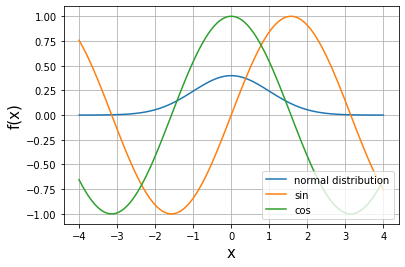

In [2]:
#Lets plot a few random functions
mu = 0
std = 1
x = np.linspace(start=-4, stop=4, num=100)
y = stats.norm.pdf(x, mu, std) 
plt.plot(x, y,label='normal distribution')
line1, = plt.plot(x, np.sin(x), label='sin')
line2, = plt.plot(x, np.cos(x), label='cos')
plt.legend(loc='lower right')
plt.grid()
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)
plt.show()

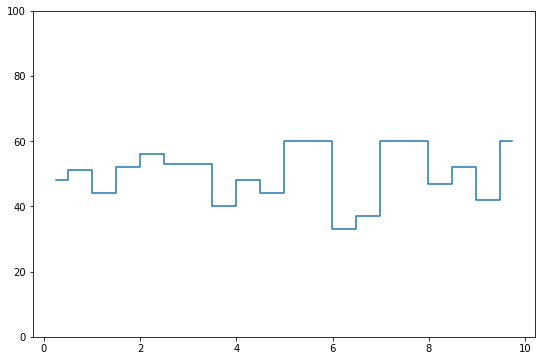

In [3]:
#Now lets make a histogram
fig, ax = plt.subplots(figsize=(9,6))
bkg = np.random.uniform(0,10, 1000)
histy, bin_edges = np.histogram(bkg, bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.set_ylim([0,100])
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')

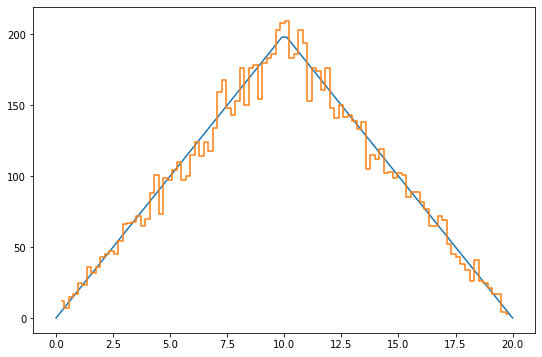

In [18]:
#now lets make something a little different and add two numbers
bkg1 = np.random.uniform(0,10, 10000)
bkg2 = np.random.uniform(0,10, 10000)
data = bkg1+bkg2
fig, ax = plt.subplots(figsize=(9,6))
histy, bin_edges = np.histogram(data, bins=100)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
#now see below for the function we will plot
def function(ix,norm=10000/(100/20)):#note the norm is for 100 bins over 0-20
    if ix < 10:
        return norm*(ix/100)
    else: 
        return norm*(20-ix)/100
x = np.linspace(start=0, stop=20, num=100)
y = np.array(list(map(function, x)))
plt.plot(x, y,label='analytic pdf')
#ax.set_ylim([0,150])
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')

The first interesting question is what is the above distrbiution. To understand this, we need to define a probabilitiy distribution function or pdf. When we sample a uniform distribution from 0 to 10 we are taking a random number in that range. We can translate the process of taking a random sample into a distributim $p(x)$ where we define the probability $P(X)$ as 
\begin{equation}
P(X)=\int_{a}^{b}p(x)dx
\end{equation}
or in other words the probability that a number is sampled between $a$ and $b$ is given by the integral of $p(x)$ over that range. As a consquence we have that integrating over all possibilities we have a probability of 1. 
\begin{equation}
1=\int_{\infty}^{\infty}p(x)dx
\end{equation}
This should be very familiar if you have taken quantum mechanics. Some important consquences of this is that we can define the expectation $E[x]$
\begin{equation}
E[x]=\int_{\infty}^{\infty}xp(x)dx
\end{equation}
or in other words the probability weighted value of $x$. We can also define the variance of this distribution as 
\begin{equation}
V[x]=\int_{\infty}^{\infty}\left(x-E[x]\right)^{2}p(x)dx
\end{equation}
or in other words the spread of hte numbers about the mean of the distribution. The variance is defined by the above formula, but it holds an important interpretation as we will see later. 

Ok Now back to the above distribution, lets first turn a uniform distribution from 0 to 10 into a pdf. For this we know that the function is flat between 0 and 10, and zero otherwise. Consequently $f(x)=a$ when $x\in[0,10]$, and 
\begin{equation}
1=\int_{0}^{10}adx=ax|_{0}^{10}=10a\\
a=\frac{1}{10}
\end{equation}
As a quick check we find the expectation of this distribution is 
\begin{equation}
E[x]=\int_{0}^{10}axdx=\frac{ax^2}{s}|_{0}^{10}=50a\\
E[x]=5
\end{equation}

Now lets consider sampling this distribution twice. If we get a result $x^\prime=x_{1}+x_{2}$ we have a broad range of possible solutions. Lets say $x^{\prime}=10$ then it could be that one sample $x_{1}=5$ and the other sample $x_{2}=5$ or it could be that $x_{1}=10$ and $x_{2}=0$, so we need to integrate over all possibilities. For this we have then 
\begin{eqnarray}
p(x^\prime=x_{1}+x_{2})&=&\int_{-\infty}^{\infty}p(x_{1})p(x^\prime-x_{1})dx_{1}
&=&\int_{0}^{10}\frac{1}{a}p(x^\prime-x_{1})dx_{1}\\
&=&\int_{x^\prime-10}^{10}\frac{1}{a^2}dx_{1}~\forall x^\prime \geq 10\\
&=&\frac{20-x^\prime}{a^2}~\forall x^\prime \geq 10\\
&=&\frac{x^\prime}{a^2}~\forall x^\prime < 10\\
\end{eqnarray}
Or in otherwords we have a line sloping up when we are below 10, and sloping down when we are above 10. To check that this is a full pdf we can then check the normalization
\begin{equation}
\int_{-\infty}^{\infty}p(x^\prime)dx^{\prime}=\frac{x^2}{2a^2}|^{10}_{0}+\frac{20x-x^2/2}{a^2}|^{20}_{10}\\
1=\frac{100}{200}+\frac{400-200}{100}-\frac{200-50}{100}\\
1=\frac{1}{2}+\frac{200-150}{100}=1\\
\end{equation}

The nice thing about computers is we don't need to do all these integrals to get these lines. Lets sample some crazier distributions. 


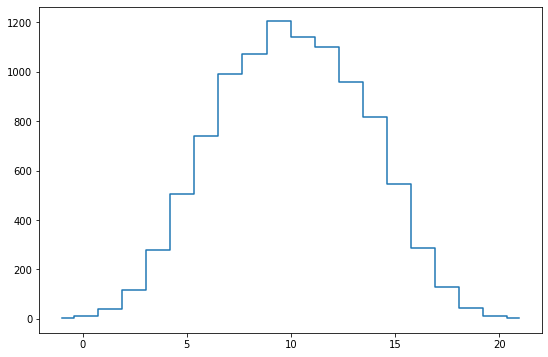

In [5]:
#Sample something crazy
bkg1 = np.random.uniform(0,10, 10000)
bkg2 = np.random.normal (5,2 , 10000)
data = bkg1+bkg2
fig, ax = plt.subplots(figsize=(9,6))
histy, bin_edges = np.histogram(data, bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
#ax.set_ylim([0,150])
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')

Lets consider a set of measurements. Typically we treat these measurements as independent variables, each from some underlying distribution. We can think of these measurements as independent, as a consquence. We can define the joint pdf distribution of these as 
\begin{equation}
p(x_{1},x_{2})=p(x_{1})p(x_{2})dx_{1}dx_{2} \\
p(x_{1},...,x_{n})=\Pi_{i=0}^{i=N}p(x_{i})
\end{equation}
We can define the average of these distributions as
\begin{equation}
\bar{x}=\frac{1}{N}\sum_{i=1}^{N} x_{i}
\end{equation}
and the variance over these distributions as 
\begin{equation}
V[\bar{x}]=\frac{1}{N}\sum_{i=1}^{N} (x_{i}-\bar{x})^{2}
\end{equation}
Note the variance can be seen from the discrete definition of variance
\begin{equation}
V[x]=E[(x-\bar{x})^2]\\
V[x]=\sum_{i=1}^{N}p(x_{i})(x_{i}-\mu)^{2}
\end{equation}

The mean of these distributions is thus going to be given by 
\begin{equation}
E[\bar{x}]=\int \left(\frac{1}{N}\sum_{i=1}^{N} x_{i}\right)\Pi_{i=0}^{i=N}p(x_{i}) dx_{i}\\
E[\bar{x}]=\frac{1}{N}\times N\int x_{j}\Pi_{i=0}^{i=N}p(x_{i}) dx_{i}\\
E[\bar{x}]=\bar{x}\\
\end{equation}

And the variance of these distributions is going to be 
\begin{equation}
%\int_{-\infty}^{\infty}\left(x_{i}-\bar{x}\right)^{2}\Pi_{i=0}^{i=N}p(x_{i}) dx_{i}\\
V[\bar{x}]=\frac{1}{N}\sum_{i=1}^{N} (x_{i}-\bar{x})^{2}\\
V[\bar{x}]=\frac{1}{N}V(x)
\end{equation}
Where $V(x)$ is the variance of any distribution. This is very important. What this means is that if we sample many times a distribution each with a variance $\sigma$, we have that the variance of the average over this distribution scales as $\frac{1}{N}$ the variance. This means that if you are measuing the mean, the uncertainty on the mean scales as the $\sqrt{V[\bar{x}]}=\sqrt{\frac{1}{N}V[x]}$. 
To understand how this works, lets make some toys. 


/Users/pharris/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """


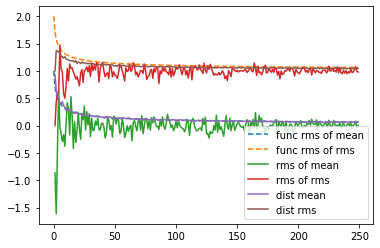

In [57]:
import math
#Lets get the normal mean and variance
def sample(iN):
    sample  = np.random.normal (0,1,iN)
    return sample.mean(),sample.std()

#now lets get the mean and variance of the mean itself
def meansample(iN):
    ntoys=100
    allmeans=np.array([])
    allrmses=np.array([])
    for i0 in range(ntoys):
        pMean,pRMS=sample(iN)
        allmeans=np.append(allmeans,pMean)
        allrmses=np.append(allrmses,pRMS)
    return allmeans.std(),allrmses.std()
nvar=[]
mean=[]
rms=[]

distmean=[]
distrms=[]

funcrms=[]
funcmean=[]
for i0 in range(250):
    funcmean.append(1./math.sqrt(1+i0))
    funcrms .append(1+1./math.sqrt(1+i0))
    pMean,pRMS=sample(i0)
    distmean.append(pMean)
    distrms.append(pRMS)
    pMean,pRMS=meansample(i0)
    nvar.append(i0)
    mean.append(pMean)
    rms.append(1+pRMS)

plt.plot(nvar,funcmean,'--',label='func rms of mean')
plt.plot(nvar,funcrms,'--',label='func rms of rms')
plt.plot(nvar,distmean,label='rms of mean')
plt.plot(nvar,distrms,label='rms of rms')
plt.plot(nvar,mean,label='dist mean')
plt.plot(nvar,rms,label='dist rms')
plt.legend(loc='lower right')

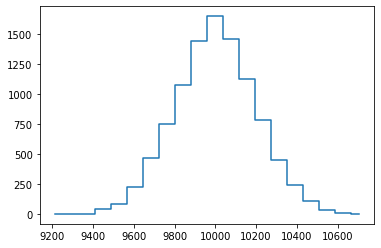

In [32]:
#Now lets say we do a measurement, and the measurement takes an input variable that is varying, 
#and applies a function to it. What is the spread of the function
meas = np.full(10000,100)
unc  = np.random.normal (0,1, 10000)
meas = meas+unc
def function(ix):#note the norm is for 100 bins over 0-20
    return ix**2
    if ix < 0:
        return -ix**2
    else:
        return ix**2
outmeas = np.array(list(map(function, meas)))
histy, bin_edges = np.histogram(outmeas, bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')

if the probaility of the input distribution is $p(x)$ then we as the probability distribtuion of the output. Well in this case we just have that $x^{\prime}=f(x)$ and so the probability distribution can be given by
\begin{eqnarray}
p^{\prime}(x^\prime)dx^\prime&=&f(p(x))dx^\prime \\
                             &=&f(p(x))\frac{dx^\prime}{dx}dx\\
                             &=&f(p(x))\frac{df}{dx}dx\\
\end{eqnarray}
This means that if I consider the spread of the resulting function. 
$f(x+\Delta x)-f(x)\approx\frac{df}{dx}\Delta x$. In the case we have $f(x)=x^{2}$ or $\frac{df}{dx}=2x$. What that means is that if $\sigma_{f(x)}\approx2x\sigma_{x}$

In [33]:
print(meas.std(),outmeas.std())

0.9939723096769734 198.7546253429522


Lets say you flip a coin 10 times and the probability of heads is $p$. Lets say 3 times you get a heads distribtuion. 
* What are the number of different cases there are 5 heads?
In this case we have 3 heads out of 10 flips so we have have $_{10}C_{3}=\frac{10!}{3!}{7!}$ or generally we have for $n$ flips and $m$ cases $\frac{n!}{m!(n-m)!}$. 
* What is the probability of this scenario
In this case, the probability is the probability of 3 heads $p^{3}$ and the probability of 7 no heads $(1-p)^{7}$ and for $n$ flips and $m$ cases we have $p^{m}(1-p)^{n}$. 
* What is the distribution?
Putting the above two together we have the binomial distribution as a function of $p$ given by 
$f(m)=p^{m}(1-p)^{n}\frac{n!}{m!(n-m)!}$

From this we can compute for 1 heads and 0 tails
\begin{equation}
E[m]=\int_0^{n} p^{m}(1-p)^{n}\frac{n!}{m!(n-m)!} dm \\
E[m]=\sum_{0}^{n} p\times 1+(1-p)\times 0
E[m]=np\\
\end{equation}
Thus for a single choice the mean is $p$ so we have teh variance is
\begin{equation}
V[m]=\sum_{i=0}^{n} p \times (1-p)^2 + (1-p) \times (0-p)^2 \\
V[m]=\sum_{i=0}^{n} (1-p)\times (p^2 +p(1-p))  \\
V[m]=\sum_{i=0}^{n} (1-p)\times p   \\
V[m]=np(1-p)
\end{equation}

At the same time lets introduce the poisson distribution by taking the binomial distribution to the large $n$ limit. 
\begin{equation}
{\rm define~} \lambda = \lim_{n\rightarrow\infty} np \rightarrow p=\frac{\lambda}{n} \\
\lim_{n\rightarrow\infty}\frac{n!}{m!(n-m)!}p^{m}(1-p)^{n} = \frac{n(n-1)...(n-m)}{m!}\left(\frac{\lambda}{n}\right)^{m}\left(1-\frac{\lambda}{n}\right)^{n} \\
\approx\frac{n^m}{m!}\frac{\lambda^{m}}{n^{m}}\left(1-\frac{\lambda}{n}\right)^{n} \\
\approx\frac{\lambda^{m}}{m!}e^{-\lambda} \\
f(m;\lambda=np)=\frac{\lambda^{m}}{m!}e^{-\lambda}
\end{equation}

As a consequence we have that the mean and variance of a poission distribution is (noting $p\rightarrow0$ in the large $n$ limit)
\begin{equation}
E[m]=\lambda \\
V[m]=\lambda
\end{equation}
or in other words the standard deviation of the distributi goes as the $\sqrt{\lambda}$ or root of the mean of hte distribution. 

This plays a critical role in a everything we do since a random choice with any bin can be approximated as poisson. 






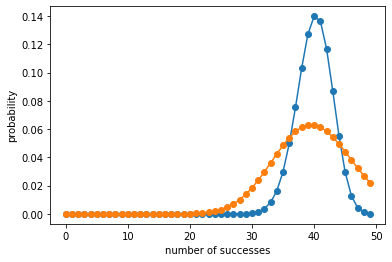

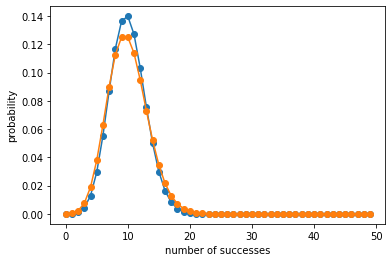

In [84]:
n=50
p=0.8
k=np.arange(0,50)
binomial=stats.binom.pmf(k,n,p)
poisson=stats.poisson.pmf(k,n*p)
plt.plot(k,binomial,'o-')
plt.plot(k,poisson,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()

#And now one where 
n=50
p=0.2
k=np.arange(0,50)
binomial=stats.binom.pmf(k,n,p)
poisson=stats.poisson.pmf(k,n*p)
plt.plot(k,binomial,'o-')
plt.plot(k,poisson,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()


binomial: 0.08030128564591586
poisson: 0.06522913800493721


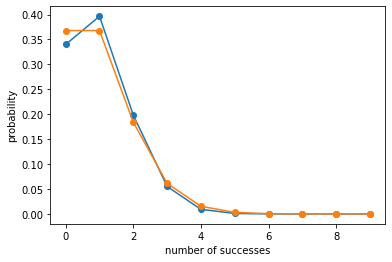

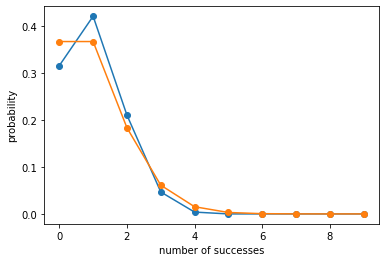

B Mean: 51.999999951448956 Var: 50.1428548141454
P Mean: 51.999999888566 StdDev: 51.9999946511691


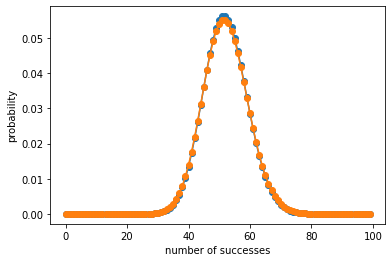

In [108]:
#Now with the current rate of Gravitataional wave detection we observe a GW once per week
#What is probability of 3 or mroe graviational waves in one week
#In this case this is the probability of 3 random events happening in a short period of time, since we know 
#One way to phrase this is that the probability of a GW on a day is 1/7 and we hvae 7 days in a week
#What is the probability of 3 or more. The distribtuion for this is
n=7.
p=1./7.
k=np.arange(0,10)
binomial=stats.binom.pmf(k,n,p)
poisson=stats.poisson.pmf(k,n*p)
total1=0
total2=0
for i0 in range(len(k)):
    if k[i0] > 2:
        total1+= poisson[i0]
        total2+= binomial[i0]
        
print("binomial:",total1)
print("poisson:",total2)
plt.plot(k,binomial,'o-')
plt.plot(k,poisson,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()

#or we could do quarter weeks with 1/4
n=4.
p=1/4.
k=np.arange(0,10)
binomial=stats.binom.pmf(k,n,p)
poisson=stats.poisson.pmf(k,n*p)
plt.plot(k,binomial,'o-')
plt.plot(k,poisson,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()

#now what about for GWs in a year
n=28*52.
p=1/28.
k=np.arange(0,100)
binomial=stats.binom.pmf(k,n,p)
poisson=stats.poisson.pmf(k,n*p)
average  = np.average(k, weights=binomial)
variance = np.average((k-average)**2, weights=binomial)
print("B Mean:",average,"Var:",variance)

average  = np.average(k, weights=poisson)
variance = np.average((k-average)**2, weights=poisson)
print("P Mean:",average,"StdDev:",variance)
plt.plot(k,binomial,'o-')
plt.plot(k,poisson,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()
#This last one is a gaussian 

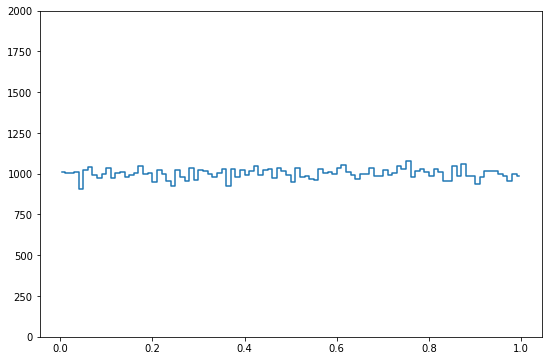

0.9999999999996817


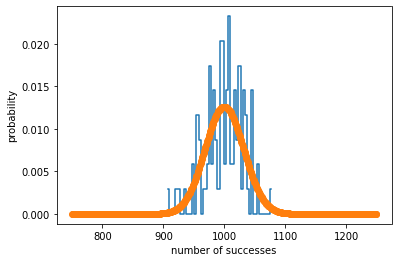

In [137]:
#So this means that GW is a poisson process. Additionally, what this means is that for any random process
#we can expect the variation in each bin to be be poisson fluctuated.
#Lets consider filling a histogram from uniform samples
fig, ax = plt.subplots(figsize=(9,6))
N=100000
nbins=100
sample  = np.random.uniform (0,1,N)
histy, bin_edges = np.histogram(sample, bins=nbins)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.set_ylim([0,2*N/nbins])
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
plt.show()

#now lets look at the distribution in each bin
histy2, bin_edges2 = np.histogram(histy, bins=50)
bin_centers2 = 0.5*(bin_edges2[1:] + bin_edges2[:-1])
plt.plot(bin_centers2,histy2/np.sum(histy2)/(bin_edges2[10]-bin_edges2[9]),drawstyle = 'steps-mid')

lamb=N/nbins
k=np.arange(0.75*N/nbins,1.25*N/nbins)
poisson=stats.poisson.pmf(k,lamb)
print(np.sum(poisson))
plt.plot(k,poisson,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()

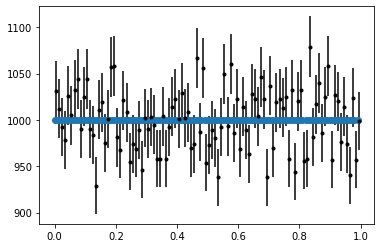

In [149]:
#And so the bins are poisson fluctuated. This is why when we plot data in a histogram we put error bars 
#Corresponding the poission uncertainty in a bin
N=100000
nbins=100
sample  = np.random.uniform (0,1,N)
histy, bin_edges = np.histogram(sample, bins=nbins)
yerr=np.sqrt(histy)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.set_ylim([0,2*N/nbins])
plt.errorbar(bin_centers,histy,yerr=yerr,marker='.',c='black',linestyle = 'None')

k=np.arange(0,1,0.01)
vals=np.full((100),N/nbins)

plt.plot(k,vals,'o-')

plt.show()


In [147]:
#to do: histogram of dijet mass plot

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])